# Which genres are most beneficial or detrimental to the different MH disorders included in this study?

In [505]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [506]:
data_path="../gabriela's_work/cleaned_data.csv"
data= pd.read_csv(data_path)
data.head()

,Age,Hours per day,Fav genre,Music effects
0,18.0,3.0,Latin,NaN
1,63.0,1.5,Rock,NaN
2,18.0,4.0,Video game music,No effect
3,61.0,2.5,Jazz,Improve
4,18.0,4.0,R&B,Improve


In [507]:
cols= ["Age","Hours per day", "Fav genre", "Music effects"]
df=data[cols]
df.dropna()

,Age,Hours per day,Fav genre,Music effects
2,18.0,4.0,Video game music,No effect
3,61.0,2.5,Jazz,Improve
4,18.0,4.0,R&B,Improve
5,18.0,5.0,Jazz,Improve
6,18.0,3.0,Video game music,Improve
...,...,...,...,...
731,17.0,2.0,Rock,Improve
732,18.0,1.0,Pop,Improve
733,19.0,6.0,Rap,Improve
734,19.0,5.0,Classical,Improve


In [508]:
#Age groups
bins = [0, 30, 40, 50, 60, 100]
labels= ['<20', '20-39', '40-49', '50-59', '60+']

In [509]:
df["Age_Group"]=pd.cut(df["Age"], bins=bins, labels=labels)
df.head()

,Age,Hours per day,Fav genre,Music effects,Age_Group
0,18.0,3.0,Latin,NaN,<20
1,63.0,1.5,Rock,NaN,60+
2,18.0,4.0,Video game music,No effect,<20
3,61.0,2.5,Jazz,Improve,60+
4,18.0,4.0,R&B,Improve,<20


In [510]:
df.info()
df['Age'] = df['Age'].astype(object)
df['Hours per day'] = df['Hours per day'].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            735 non-null    float64 
 1   Hours per day  736 non-null    float64 
 2   Fav genre      736 non-null    object  
 3   Music effects  728 non-null    object  
 4   Age_Group      735 non-null    category
dtypes: category(1), float64(2), object(2)
memory usage: 24.1+ KB


In [511]:

df2=df.set_index(["Age_Group"])["Music effects"]
df2


Age_Group
<20          NaN
60+          NaN
<20    No effect
60+      Improve
<20      Improve
         ...    
<20      Improve
<20      Improve
<20      Improve
<20      Improve
<20      Improve
Name: Music effects, Length: 736, dtype: object

In [512]:
music_results=df["Music effects"].value_counts()
music_results

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In [513]:
improve_data=df.loc[(df["Music effects"] =="Improve")]
improve_data_count=rock_data.groupby(["Fav genre"]).size()
improve_data_count.sort_values(ascending=False)

Fav genre
Rock                126
Pop                  85
Metal                67
Classical            39
Hip hop              31
EDM                  30
R&B                  26
Video game music     26
Folk                 23
Country              20
K pop                19
Rap                  17
Jazz                 16
Lofi                 10
Gospel                6
Latin                 1
dtype: int64

In [514]:
no_effect_data=df.loc[(df["Music effects"] =="No effect")]
no_effect_data_count=no_effect_data.groupby(["Fav genre"]).size()
no_effect_data_count.sort_values(ascending=False)

Fav genre
Rock                53
Pop                 25
Metal               21
Video game music    14
Classical           13
R&B                  9
EDM                  6
Folk                 6
Country              5
Hip hop              4
Jazz                 4
K pop                4
Rap                  4
Latin                1
dtype: int64

In [515]:
worsen_data=df.loc[(df["Music effects"] =="Worsen")]
worsen_data_count=worsen_data.groupby(["Fav genre"]).size()
worsen_data_count.sort_values(ascending=False)

Fav genre
Rock                7
Pop                 4
Video game music    4
Classical           1
Rap                 1
dtype: int64

In [516]:
effects_data=pd.DataFrame({
    "Improve": improve_data_count,
    "No Effect": no_effect_data_count,
    "Worsen": worsen_data_count
})
organize_data=effects_data.sort_values(by= "Improve",ascending=False)
organize_data

,Improve,No Effect,Worsen
Fav genre,,,
Rock,126,53.0,7.0
Pop,85,25.0,4.0
Metal,67,21.0,NaN
Classical,39,13.0,1.0
Hip hop,31,4.0,NaN
EDM,30,6.0,NaN
R&B,26,9.0,NaN
Video game music,26,14.0,4.0
Folk,23,6.0,NaN


In [517]:
genres = organize_data.index
genres

Index(['Rock', 'Pop', 'Metal', 'Classical', 'Hip hop', 'EDM', 'R&B',
       'Video game music', 'Folk', 'Country', 'K pop', 'Rap', 'Jazz', 'Lofi',
       'Gospel', 'Latin'],
      dtype='object', name='Fav genre')

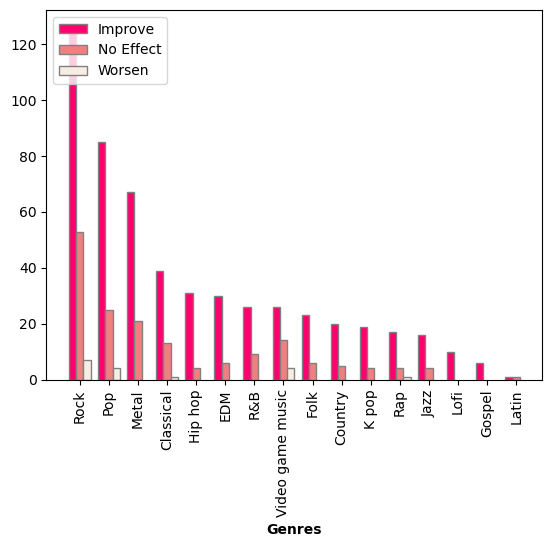

In [518]:
# Data from the table
genres = organize_data.index
values=organize_data.values.T


# Create a figure and axis
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(genres))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

# Plot the bars
plt.bar(r1,values[0], color='#ff006e', width=bar_width, edgecolor='grey', label='Improve')
plt.bar(r2,values[1], color= "#f08080", width=bar_width, edgecolor='grey', label='No Effect')
plt.bar(r3,values[2], color='#f7ede2', width=bar_width, edgecolor='grey', label='Worsen')

# Add xticks on the middle of the group bars
plt.xlabel('Genres', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(genres))], genres, rotation=90)

# Add a legend
plt.legend()


plt.show()


In [519]:
fav_genre=df["Fav genre"].value_counts()
fav_genre

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

In [520]:
cols2=["Age_Group","Hours per day", "Fav genre","Music effects"]
df3=df[cols2]
df4=df3.dropna().set_index(["Age_Group"])
df4.sort_values(by="Hours per day", ascending=False)

,Hours per day,Fav genre,Music effects
Age_Group,,,
<20,24.0,Rap,Improve
<20,24.0,Rock,Improve
60+,24.0,Rap,No effect
<20,20.0,Rock,No effect
<20,18.0,EDM,Improve
...,...,...,...
40-49,0.0,Rock,No effect
20-39,0.0,Rock,Worsen
40-49,0.0,Rock,No effect


In [595]:
positive=improve_data.groupby(["Age_Group"]).size()
nothing=no_effect_data.groupby(["Age_Group"]).size()
negative=worsen_data.groupby(["Age_Group"]).size()

hours_effect=pd.DataFrame({
    "Improve": positive,
    "No Effect": nothing,
    "Worsen": negative
})


hours_data=hours_effect.sort_values(by="Age_Group",ascending=True)
hours_data

C:\Users\gabri\AppData\Local\Temp\ipykernel_3600\3273688655.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive=improve_data.groupby(["Age_Group"]).size()
C:\Users\gabri\AppData\Local\Temp\ipykernel_3600\3273688655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nothing=no_effect_data.groupby(["Age_Group"]).size()
C:\Users\gabri\AppData\Local\Temp\ipykernel_3600\3273688655.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence

,Improve,No Effect,Worsen
Age_Group,,,
<20,443,125,12
20-39,45,26,5
40-49,19,7,0
50-59,18,8,0
60+,16,3,0


In [598]:


avg=pd.DataFrame({
"Improve":hours_data['Improve'].mean(),
"No Effect":hours_data['No Effect'].mean(),
"Worsen":hours_data['Worsen'].mean()},
                index=[0])data = {'Improve': 108.2, 'No Effect': 33.8, 'Worsen': 3.4}
df = pd.DataFrame(data, index=[0])

# Plot a pie chart using the DataFrame
df.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')
plt.show()
avg


,Improve,No Effect,Worsen
0,108.2,33.8,3.4


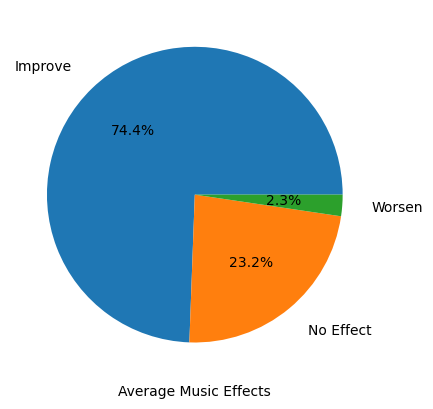

In [610]:

# Data for the pie chart
labels = ['Improve', 'No Effect', 'Worsen']
sizes = [108.2, 33.8, 3.4]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360, labeldistance=1.2)
plt.xlabel('Average Music Effects')
plt.show()

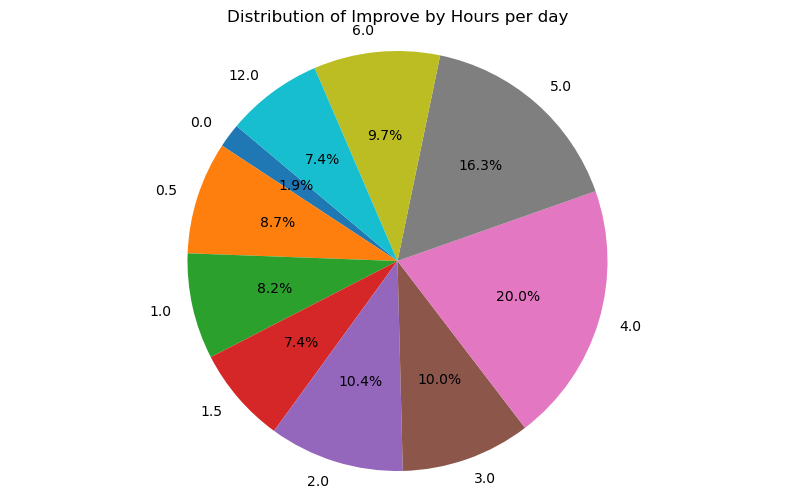

In [575]:
data = {
    'Hours per day': [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 12.0],
    'Improve': [2.0, 14.0, 79.0, 10.0, 126.0, 86.0, 70.0, 44.0, 34.0, 6.0],
    'No Effect': [3.0, 5.0, 32.0, 4.0, 41.0, 30.0, 12.0, 9.0, 12.0, 2.0],
    'Worsen': [1.0, 1.0, 4.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0]
}

# Calculate the total for each row
totals = [sum(row[1:]) for row in zip(data['Improve'], data['No Effect'], data['Worsen'])]

# Calculate the percentages for each category
improve_percent = [improve / total * 100 for improve, total in zip(data['Improve'], totals)]
no_effect_percent = [no_effect / total * 100 for no_effect, total in zip(data['No Effect'], totals)]
worsen_percent = [worsen / total * 100 for worsen, total in zip(data['Worsen'], totals)]

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(improve_percent, labels=data['Hours per day'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Improve by Hours per day')
plt.show()

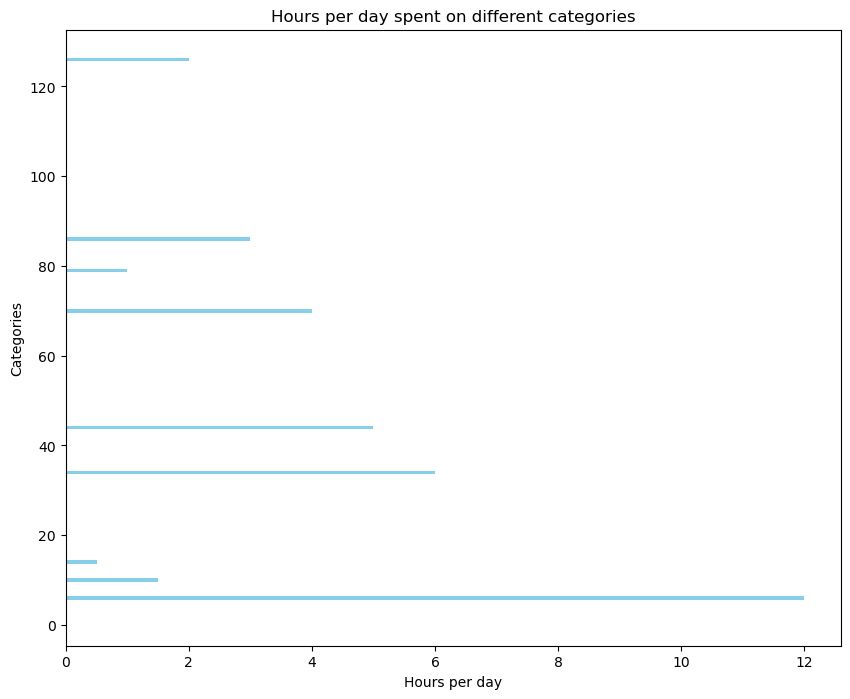

In [524]:
categories =hours_data["Improve"]
hours_per_day = hours_data.index

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(categories, hours_per_day, color='skyblue')
plt.xlabel('Hours per day')
plt.ylabel('Categories')
plt.title('Hours per day spent on different categories')
plt.show()

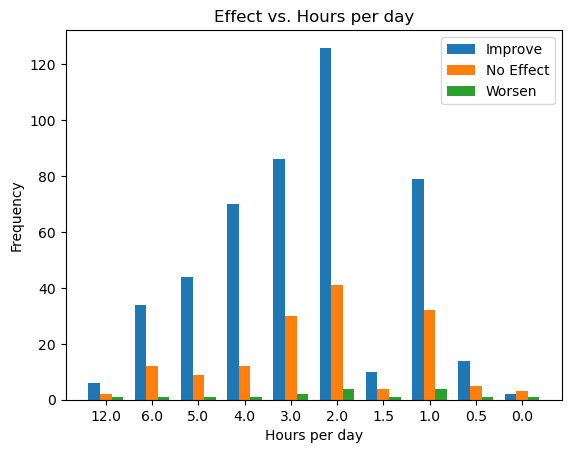

In [532]:
hours_per_day = [12.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.5, 1.0, 0.5, 0.0]
improve = [6.0, 34.0, 44.0, 70.0, 86.0, 126.0, 10.0, 79.0, 14.0, 2.0]
no_effect = [2.0, 12.0, 9.0, 12.0, 30.0, 41.0, 4.0, 32.0, 5.0, 3.0]
worsen = [1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 4.0, 1.0, 1.0]


x = np.arange(len(hours_per_day))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, improve, width, label='Improve')
rects2 = ax.bar(x, no_effect, width, label='No Effect')
rects3 = ax.bar(x + width, worsen, width, label='Worsen')

ax.set_xlabel('Hours per day')
ax.set_ylabel('Frequency')
ax.set_title('Effect vs. Hours per day')
ax.set_xticks(x)
ax.set_xticklabels(hours_per_day)
ax.legend()

plt.show()

In [547]:
plot_data=pd.DataFrame({
"improve":[6.0, 34.0, 44.0, 70.0, 86.0, 126.0, 10.0, 79.0, 14.0, 2.0],
"no_effect":[2.0, 12.0, 9.0, 12.0, 30.0, 41.0, 4.0, 32.0, 5.0, 3.0],
"worsen": [1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 4.0, 1.0, 1.0]
},index=[12.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.5, 1.0, 0.5, 0.0])

plot_data.set_index


,improve,no_effect,worsen
12.0,6.0,2.0,1.0
6.0,34.0,12.0,1.0
5.0,44.0,9.0,1.0
4.0,70.0,12.0,1.0
3.0,86.0,30.0,2.0
2.0,126.0,41.0,4.0
1.5,10.0,4.0,1.0
1.0,79.0,32.0,4.0
0.5,14.0,5.0,1.0
0.0,2.0,3.0,1.0


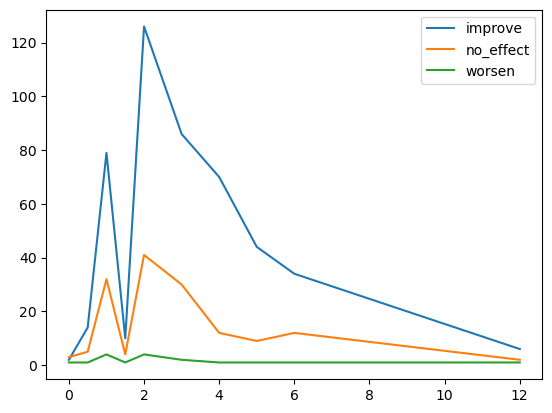

In [548]:

lines = plot_data.plot.line()

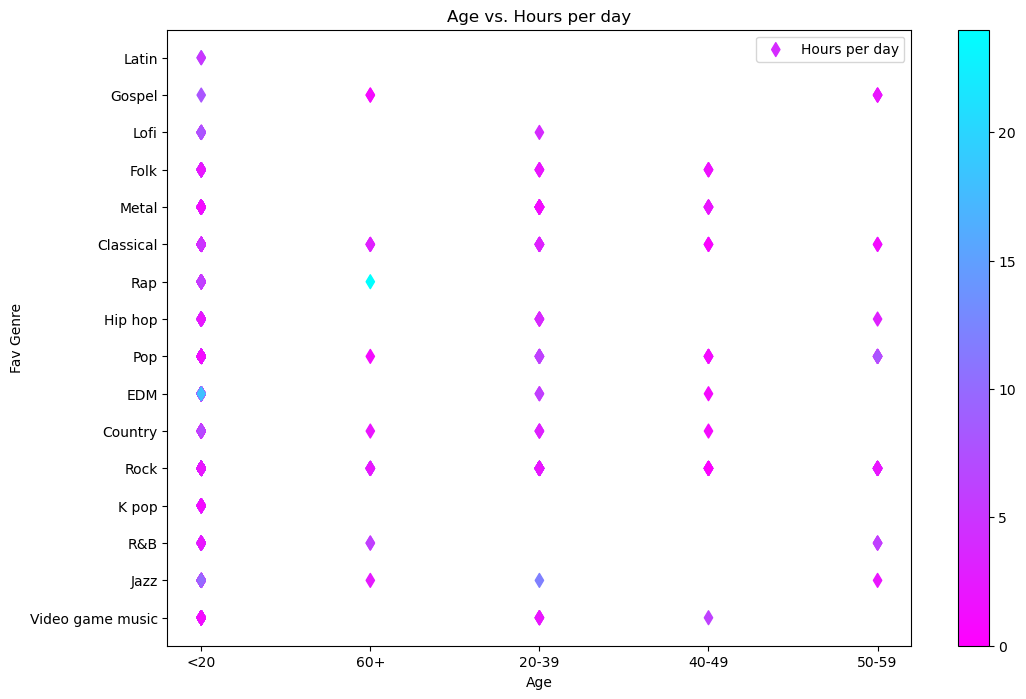

In [526]:

df = df4

# Extract data from the columns
age = df.index
music_genre = df["Fav genre"]
Hours_per_day= df["Hours per day"]
# depression = df["Depression"]
# insomnia = df["Insomnia"]
# ocd = df["OCD"]

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(age,music_genre,s=50, c=Hours_per_day, cmap="cool_r", marker='d', label='Hours per day')

plt.xlabel("Age")
plt.ylabel("Fav Genre")
plt.title('Age vs. Hours per day')
plt.colorbar()
plt.legend()
plt.show()

In [ ]:
# Create a sample DataFrame with the provided data
data = {
    'Age_Group': ['<20',  '20-39''40-49',, '40-49', '<20', '<20'],
    'Hours_per_day': [24.0, 24.0, 24.0, 20.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Fav_genre': ['Rap', 'Rock', 'Rap', 'Rock', 'EDM', 'Rock', 'Rock', 'Rock', 'Classical', 'Metal'],
    'Music_effects': ['Improve', 'Improve', 'No effect', 'No effect', 'Improve', 'No effect', 'Worsen', 'No effect', 'Improve', 'Improve']
}

df = pd.DataFrame(data)

# Group by Age_Group and calculate the average Hours_per_day
avg_hours = df.groupby('Age_Group')['Hours_per_day'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_hours.index, avg_hours.values, marker='o', color='b', linestyle='-')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.title('Average Hours per Day by Age Group')
plt.grid(True)
plt.show()
This code snippet will create a line chart showing the average hours per day for each age group based on the provided data. You can run this code in a Python environment that has Matplotlib and Pandas installed to visualize the data.



